In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#loading the dataset 
train = pd.read_csv('bank_full.csv', sep='[;]').replace('"','', regex=True)
test = pd.read_csv('bank.csv', sep='[;]').replace('"','', regex=True)

C:\Users\Bidisha Shit\AppData\Local\Temp\ipykernel_14764\334189175.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train = pd.read_csv('bank_full.csv', sep='[;]').replace('"','', regex=True)
C:\Users\Bidisha Shit\AppData\Local\Temp\ipykernel_14764\334189175.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv('bank.csv', sep='[;]').replace('"','', regex=True)


In [40]:
train.head()

,"""age","""""job""""","""""marital""""","""""education""""","""""default""""","""""balance""""","""""housing""""","""""loan""""","""""contact""""","""""day""""","""""month""""","""""duration""""","""""campaign""""","""""pdays""""","""""previous""""","""""poutcome""""","""""y"""""""
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
test.head()

,"""age","""""job""""","""""marital""""","""""education""""","""""default""""","""""balance""""","""""housing""""","""""loan""""","""""contact""""","""""day""""","""""month""""","""""duration""""","""""campaign""""","""""pdays""""","""""previous""""","""""poutcome""""","""""y"""""""
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [42]:
#removing double quotes from column names
train.columns = [col[1:-1] for col in train.columns]
test.columns = [col[1:-1] for col in test.columns]

In [43]:
train.head(1)

,ag,"""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""""
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [44]:
test.head(1)

,ag,"""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""""
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [45]:
##removing rest double quotes from column names
train.columns = [col[1:-1] for col in train.columns]
test.columns = [col[1:-1] for col in test.columns]

In [46]:
train.head(1)

,,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,"y"""
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [47]:
# rename the existing DataFrame columns (rather than creating a copy) 
train.rename(columns={'': 'age', 'y"': 'y'}, inplace=True)
test.rename(columns={'': 'age', 'y"': 'y'}, inplace=True)

In [48]:
train.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [49]:
test.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [50]:
train.shape

(45211, 17)

In [51]:
test.shape

(4521, 17)

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(6), object(11)
memory usage: 5.9+ MB


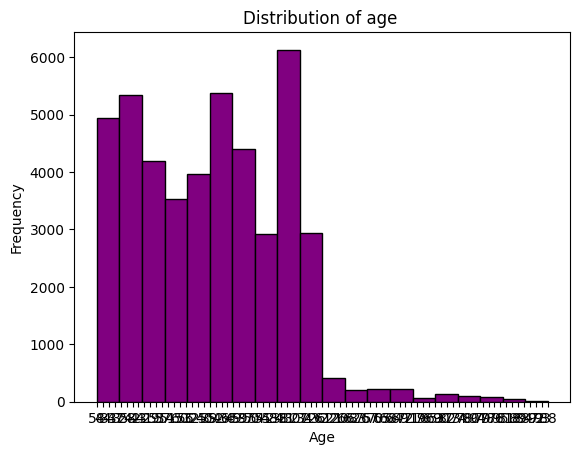

In [53]:
plt.hist(train['age'], bins=20,color='purple',edgecolor='black')
plt.title("Distribution of age ")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

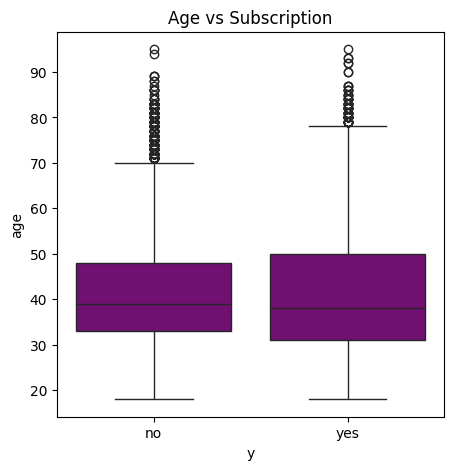

In [54]:
plt.figure(figsize=(5,5)) # this creates a figure 5 inch wide, 5 inch high
train['age']=train['age'].astype(int)
sns.boxplot(x="y",y="age",data=train,color='purple')
plt.title("Age vs Subscription")
plt.show()

In [55]:
bins = [18,30,40,50,60,100]
labels = ['18-29','30-39', '40-49','50-59','60+']
train['age']=train['age'].astype(int)
train['age_group'] = pd.cut(train['age'], bins=bins, labels=labels)

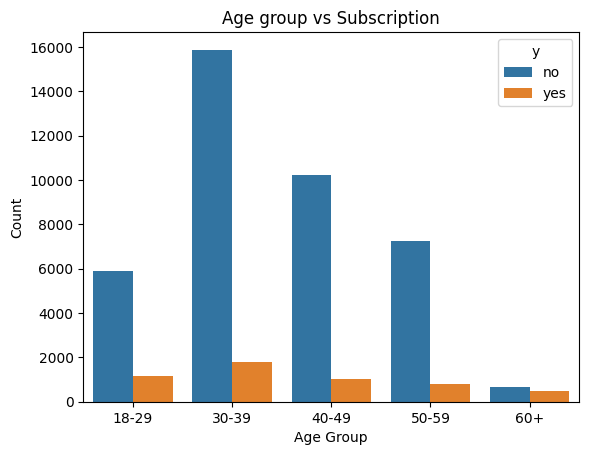

In [56]:
sns.countplot(x='age_group', hue='y',data=train)
plt.title("Age group vs Subscription")
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

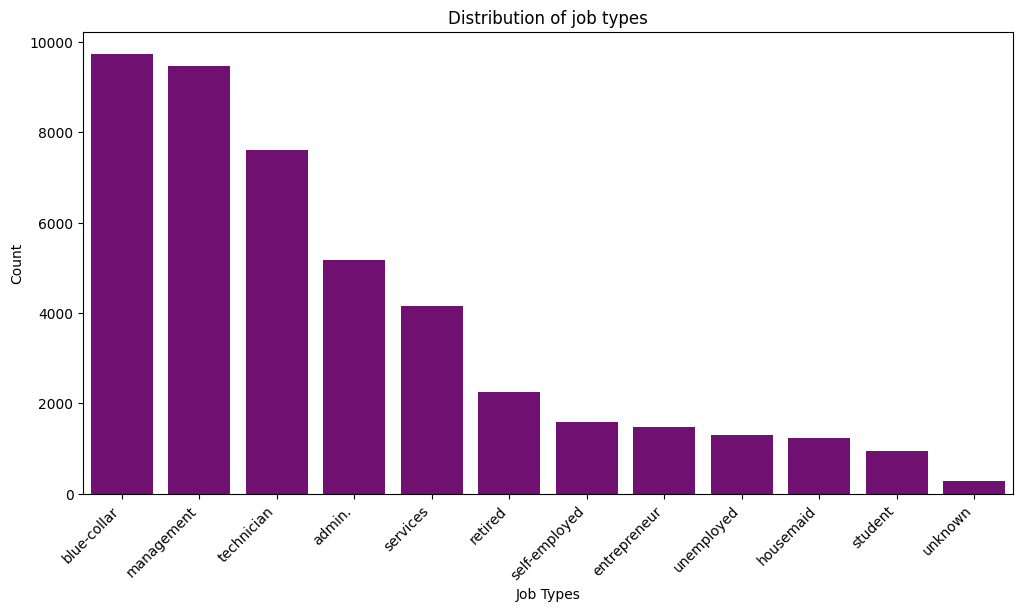

In [57]:
plt.figure(figsize=(12,6)) 
sns.countplot(x='job', data=train, order=train['job'].value_counts().index,color='purple')
plt.title("Distribution of job types")
plt.xlabel('Job Types')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

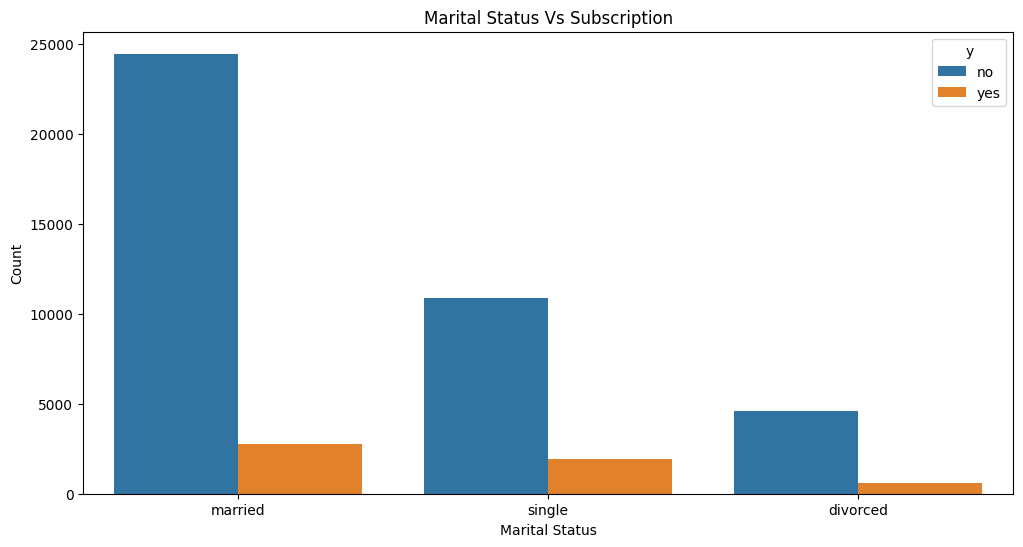

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(x='marital',hue='y',data=train,order=train['marital'].value_counts().index)
plt.title("Marital Status Vs Subscription")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

In [1]:
plt.figure(figsize=(10,6))
sns.countplot(x='education', data=train,order=train['education'].value_counts().index)
plt.title("Distribution of Education Levels")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

NameError: name 'plt' is not defined

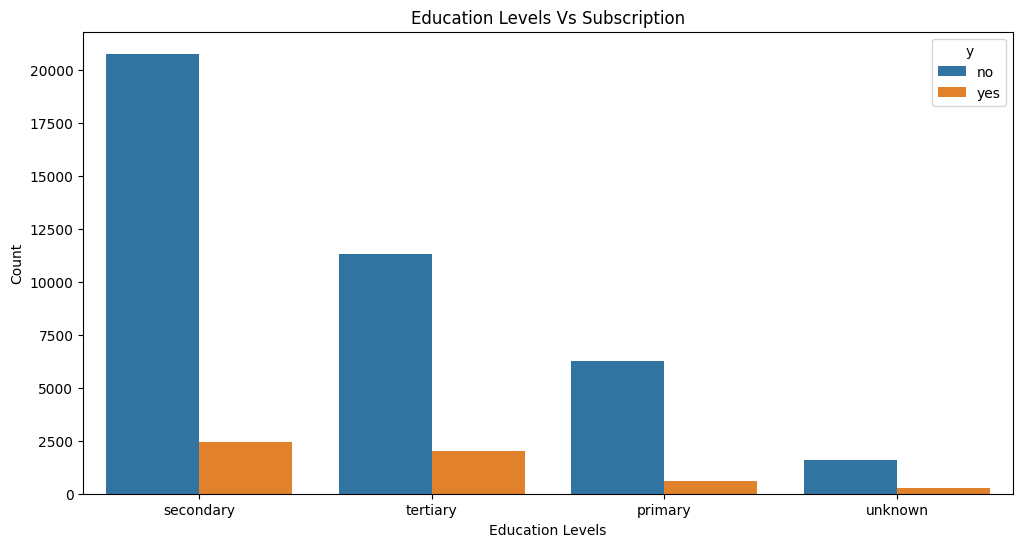

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(x='education',hue='y', data=train, order=train['education'].value_counts().index)
plt.title("Education Levels Vs Subscription")
plt.xlabel("Education Levels")
plt.ylabel("Count")
plt.show()

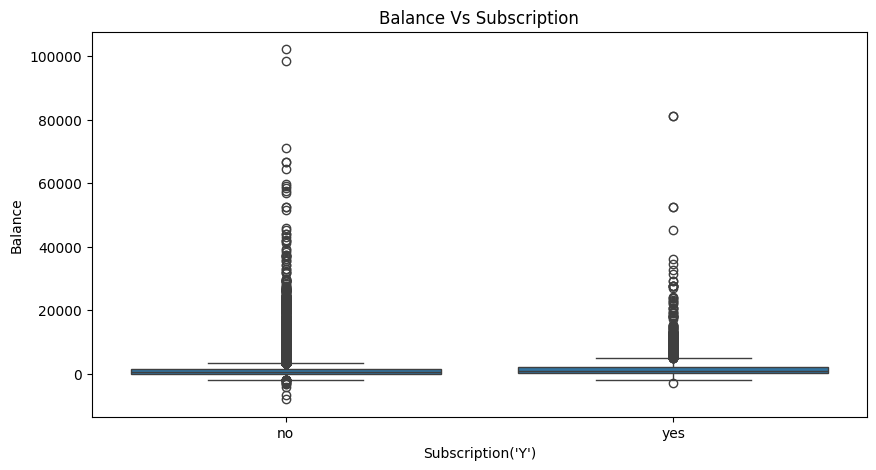

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(x='y',y='balance',data=train)
plt.title("Balance Vs Subscription")
plt.xlabel("Subscription('Y')")
plt.ylabel("Balance")
plt.show()

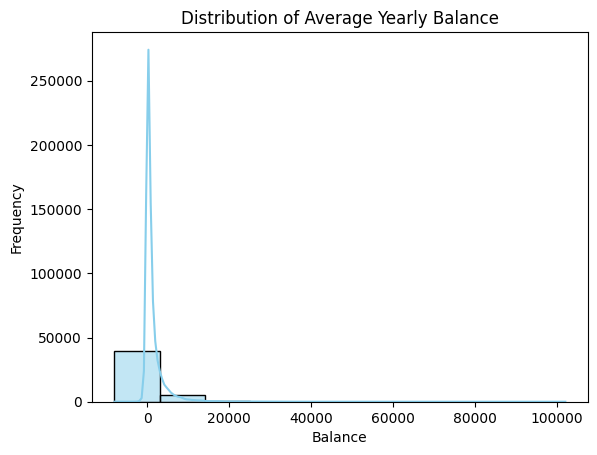

In [62]:
sns.histplot(train['balance'],color='skyblue',edgecolor='black',bins=10,kde=True)
plt.title("Distribution of Average Yearly Balance")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

In [63]:
train['balance_category'] =(train['balance'] <= 10000).astype(int)
print(train[['balance','balance_category']].head(10))

   balance  balance_category
0     2143                 1
1       29                 1
2        2                 1
3     1506                 1
4        1                 1
5      231                 1
6      447                 1
7        2                 1
8      121                 1
9      593                 1


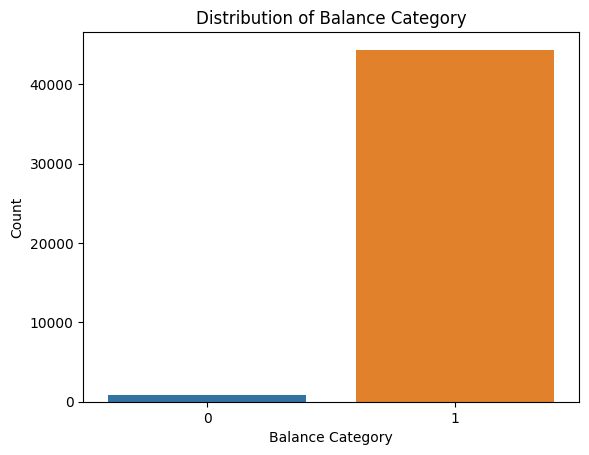

In [64]:
sns.countplot(x='balance_category',data=train,hue='balance_category',legend=False)
plt.title("Distribution of Balance Category")
plt.xlabel("Balance Category")
plt.ylabel("Count")
plt.legend
plt.show()

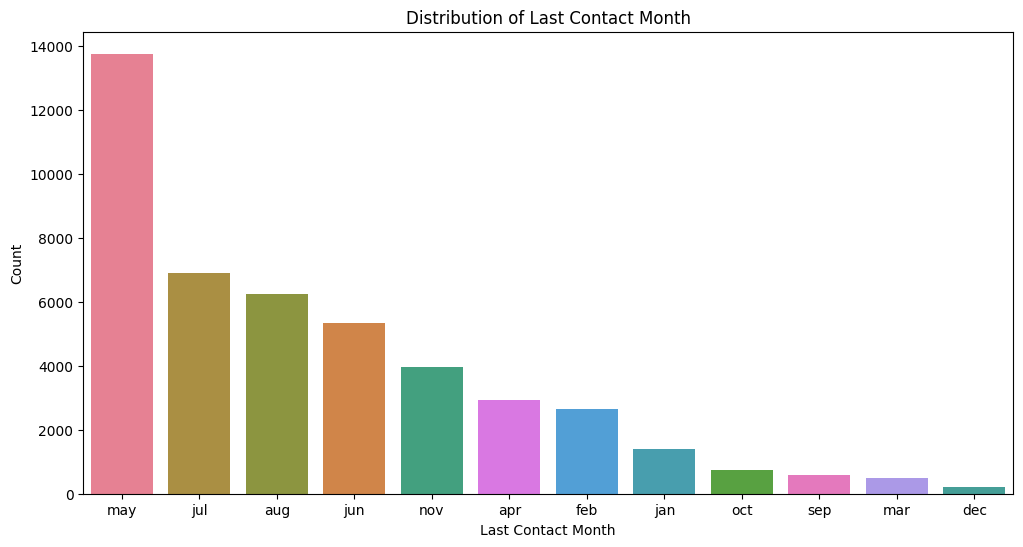

In [65]:
plt.figure(figsize=(12,6))
sns.countplot(x='month',data=train,order=train['month'].value_counts().index,hue='month')
plt.title("Distribution of Last Contact Month")
plt.xlabel("Last Contact Month")
plt.ylabel("Count")
plt.show()

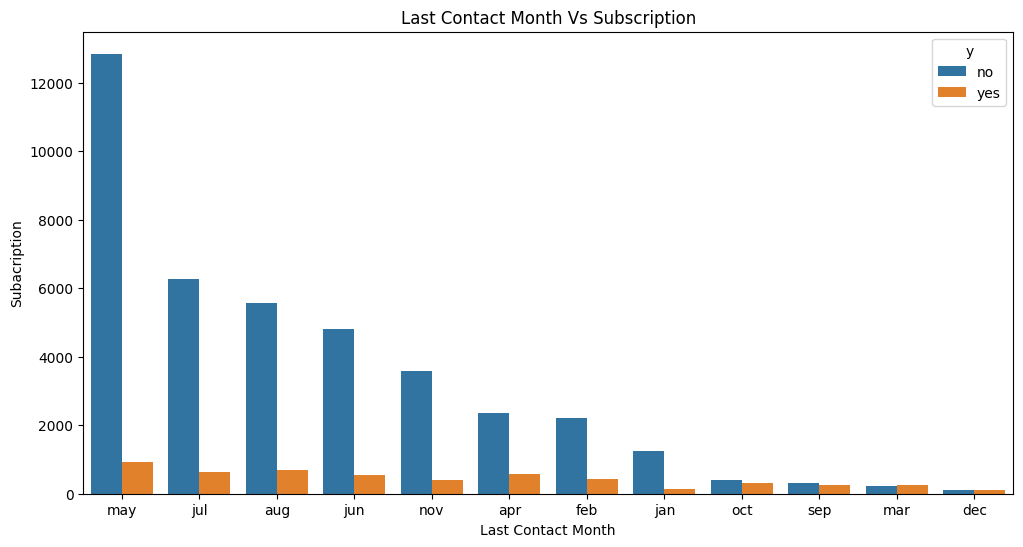

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(x='month', hue='y', data=train, order=train['month'].value_counts().index)
plt.title("Last Contact Month Vs Subscription")
plt.xlabel("Last Contact Month")
plt.ylabel("Subscription")
plt.show()

In [67]:
temp_train=train.copy()

In [68]:
temp_train.drop(columns = ['day','duration','previous','age','balance','campaign','pdays'],inplace = True)

In [69]:
temp_train.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age_group,balance_category
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,50-59,1
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,40-49,1
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,30-39,1
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no,40-49,1
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no,30-39,1


In [70]:
temp_train = pd.get_dummies(temp_train,columns = ['job','marital','education','contact','poutcome','age_group'],drop_first = True)

In [71]:
temp_train.head()

,default,housing,loan,month,y,balance_category,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+
0,no,yes,no,may,no,1,False,False,False,True,...,False,False,True,False,False,True,False,False,True,False
1,no,yes,no,may,no,1,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2,no,yes,yes,may,no,1,False,True,False,False,...,False,False,True,False,False,True,True,False,False,False
3,no,yes,no,may,no,1,True,False,False,False,...,True,False,True,False,False,True,False,True,False,False
4,no,no,no,may,no,1,False,False,False,False,...,True,False,True,False,False,True,True,False,False,False


In [72]:
temp_train.drop(columns=['month'], inplace=True)

In [73]:
temp_train.head()

,default,housing,loan,y,balance_category,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+
0,no,yes,no,no,1,False,False,False,True,False,...,False,False,True,False,False,True,False,False,True,False
1,no,yes,no,no,1,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
2,no,yes,yes,no,1,False,True,False,False,False,...,False,False,True,False,False,True,True,False,False,False
3,no,yes,no,no,1,True,False,False,False,False,...,True,False,True,False,False,True,False,True,False,False
4,no,no,no,no,1,False,False,False,False,False,...,True,False,True,False,False,True,True,False,False,False


In [74]:
temp_train.replace({'yes': 1, 'no': 0, True: 1, False: 0}, inplace=True)

In [75]:
temp_train

,default,housing,loan,y,balance_category,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+
0,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,0,1,1,0,1,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,0,1,0,0,1,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
45207,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
45208,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
45209,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [77]:
x = temp_train.drop('y', axis=1)
y = temp_train['y']

In [78]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [80]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier()

In [81]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [82]:
y_pred = classifier.predict(x_test)

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(y_pred,y_test)

0.8807917726418224